<a href="https://colab.research.google.com/github/FranciscoTeon/Video-game-ratings-best-to-worst-Data-Analysis/blob/main/IGNData_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
ign_df = pd.read_csv("/content/sample_data/ign.csv")

In [3]:
def drop_missing_values(ign_df, subset=None):

    return ign_df.dropna(subset=subset)

ign_df_cleaned = drop_missing_values(ign_df)

print(ign_df_cleaned.isnull().sum())

title            0
score            0
score_phrase     0
platform         0
genre            0
release_year     0
release_month    0
release_day      0
dtype: int64


In [4]:
def fill_missing_values(ign_df, value, subset=None):

    return ign_df.fillna(value, subset=subset)

print(ign_df.isnull().sum())

title             0
score             0
score_phrase      0
platform          0
genre            36
release_year      0
release_month     0
release_day       0
dtype: int64


In [6]:
def remove_duplicates(ign_df, subset=None):

    return ign_df.drop_duplicates(subset=subset)

print(ign_df.duplicated().sum())

48


In [7]:
def remove_outliers(ign_df, column, threshold=3):

    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return ign_df[z_scores < threshold]

print(ign_df.describe())

              score  release_year  release_month   release_day
count  18625.000000  18625.000000    18625.00000  18625.000000
mean       6.950459   2006.515329        7.13847     15.603866
std        1.711736      4.587529        3.47671      8.690128
min        0.500000   1970.000000        1.00000      1.000000
25%        6.000000   2003.000000        4.00000      8.000000
50%        7.300000   2007.000000        8.00000     16.000000
75%        8.200000   2010.000000       10.00000     23.000000
max       10.000000   2016.000000       12.00000     31.000000


In [8]:
def normalize_column(ign_df, column):

    min_val = ign_df[column].min()
    max_val = ign_df[column].max()
    ign_df[column] = (ign_df[column] - min_val) / (max_val - min_val)
    return ign_df

print(ign_df.describe())

              score  release_year  release_month   release_day
count  18625.000000  18625.000000    18625.00000  18625.000000
mean       6.950459   2006.515329        7.13847     15.603866
std        1.711736      4.587529        3.47671      8.690128
min        0.500000   1970.000000        1.00000      1.000000
25%        6.000000   2003.000000        4.00000      8.000000
50%        7.300000   2007.000000        8.00000     16.000000
75%        8.200000   2010.000000       10.00000     23.000000
max       10.000000   2016.000000       12.00000     31.000000


In [9]:
def encode_categorical(ign_df, column):

    return pd.get_dummies(ign_df, columns=[column])

print(ign_df.head())

                 title  score score_phrase        platform              genre  \
0       Checkered Flag   10.0  Masterpiece            Lynx             Racing   
1       Chrono Trigger   10.0  Masterpiece             Wii        Action, RPG   
2   Dragon Warrior III   10.0  Masterpiece  Game Boy Color                RPG   
3  Grand Theft Auto IV   10.0  Masterpiece        Xbox 360  Action, Adventure   
4  Grand Theft Auto IV   10.0  Masterpiece   PlayStation 3  Action, Adventure   

   release_year  release_month  release_day  
0          1999              7            6  
1          2011              5           25  
2          2001              7           20  
3          2008              4           25  
4          2008              4           25  


In [10]:
def rename_columns(ign_df, column_mappings):

    return ign_df.rename(columns=column_mappings)

print(ign_df.head())

                 title  score score_phrase        platform              genre  \
0       Checkered Flag   10.0  Masterpiece            Lynx             Racing   
1       Chrono Trigger   10.0  Masterpiece             Wii        Action, RPG   
2   Dragon Warrior III   10.0  Masterpiece  Game Boy Color                RPG   
3  Grand Theft Auto IV   10.0  Masterpiece        Xbox 360  Action, Adventure   
4  Grand Theft Auto IV   10.0  Masterpiece   PlayStation 3  Action, Adventure   

   release_year  release_month  release_day  
0          1999              7            6  
1          2011              5           25  
2          2001              7           20  
3          2008              4           25  
4          2008              4           25  


In [11]:
def remove_highly_missing_columns(ign_df, threshold=0.5):

    missing_fraction = ign_df.isnull().mean()
    return ign_df.loc[:, missing_fraction < threshold]

print(ign_df.head())

                 title  score score_phrase        platform              genre  \
0       Checkered Flag   10.0  Masterpiece            Lynx             Racing   
1       Chrono Trigger   10.0  Masterpiece             Wii        Action, RPG   
2   Dragon Warrior III   10.0  Masterpiece  Game Boy Color                RPG   
3  Grand Theft Auto IV   10.0  Masterpiece        Xbox 360  Action, Adventure   
4  Grand Theft Auto IV   10.0  Masterpiece   PlayStation 3  Action, Adventure   

   release_year  release_month  release_day  
0          1999              7            6  
1          2011              5           25  
2          2001              7           20  
3          2008              4           25  
4          2008              4           25  


In [12]:
def convert_column_types(ign_df, column_type_mappings):

    return ign_df.astype(column_type_mappings)

print(ign_df.dtypes)

title             object
score            float64
score_phrase      object
platform          object
genre             object
release_year       int64
release_month      int64
release_day        int64
dtype: object


In [13]:
def replace_values(ign_df, column, to_replace, replacement):

    ign_df[column] = ign_df[column].replace(to_replace, replacement)
    return ign_df

print(ign_df.head())

                 title  score score_phrase        platform              genre  \
0       Checkered Flag   10.0  Masterpiece            Lynx             Racing   
1       Chrono Trigger   10.0  Masterpiece             Wii        Action, RPG   
2   Dragon Warrior III   10.0  Masterpiece  Game Boy Color                RPG   
3  Grand Theft Auto IV   10.0  Masterpiece        Xbox 360  Action, Adventure   
4  Grand Theft Auto IV   10.0  Masterpiece   PlayStation 3  Action, Adventure   

   release_year  release_month  release_day  
0          1999              7            6  
1          2011              5           25  
2          2001              7           20  
3          2008              4           25  
4          2008              4           25  


In [14]:
ign_df.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


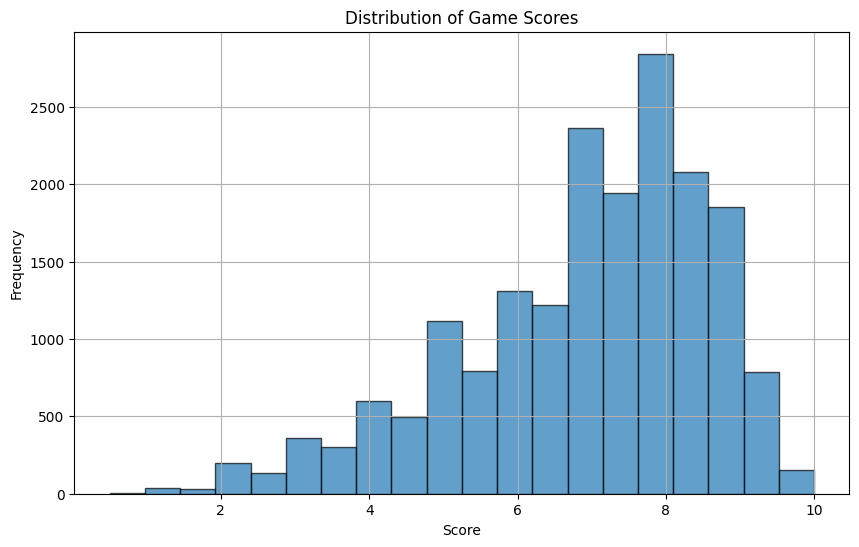

In [15]:
#What is the distribution of game scores across the entire dataset?
plt.figure(figsize=(10, 6))
plt.hist(ign_df['score'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Game Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
#How many unique game titles are present in the dataset?
unique_titles = ign_df['title'].nunique()
print(f"The number of unique game titles are: {unique_titles}")

The number of unique game titles are: 12589


In [17]:
#Which platforms have the most games reviewed?
platform_counts = ign_df['platform'].value_counts()
print(platform_counts)

platform
PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 

In [18]:
#What is the average score for games across all platforms?
avg_score = ign_df['score'].mean()
print(f"The average score for games across all platforms is: {avg_score}")


The average score for games across all platforms is: 6.950459060402685


In [19]:
#Which genres are the most common in the dataset?
genre_counts = ign_df['genre'].value_counts()
print(genre_counts)

genre
Action                      3797
Sports                      1916
Shooter                     1610
Racing                      1228
Adventure                   1175
                            ... 
RPG, Action                    1
Strategy, Simulation           1
Compilation, Compilation       1
Action, Editor                 1
Action, Strategy               1
Name: count, Length: 112, dtype: int64


In [20]:
#What are the top 10 highest-rated games?
top_10_highest_games = ign_df.nlargest(10, 'score')
print(top_10_highest_games)

                                   title  score score_phrase        platform  \
0                         Checkered Flag   10.0  Masterpiece            Lynx   
1                         Chrono Trigger   10.0  Masterpiece             Wii   
2                     Dragon Warrior III   10.0  Masterpiece  Game Boy Color   
3                    Grand Theft Auto IV   10.0  Masterpiece        Xbox 360   
4                    Grand Theft Auto IV   10.0  Masterpiece   PlayStation 3   
5  Grand Theft Auto IV (Special Edition)   10.0  Masterpiece        Xbox 360   
6  Grand Theft Auto IV (Special Edition)   10.0  Masterpiece   PlayStation 3   
7                     Grand Theft Auto V   10.0  Masterpiece   PlayStation 3   
8                     Grand Theft Auto V   10.0  Masterpiece        Xbox 360   
9                     Grand Theft Auto V   10.0  Masterpiece   PlayStation 4   

               genre  release_year  release_month  release_day  
0             Racing          1999              7     

In [21]:
#What are the top 10 lowest-rated games?
top_10_lowest_games = ign_df.nsmallest(10, 'score')
print(top_10_lowest_games)


                                         title  score score_phrase  \
18624  Looney Tunes: Back in Action: Zany Race    0.5     Disaster   
18623                       Extreme PaintBrawl    0.7     Disaster   
18622                      Action Girlz Racing    0.8     Disaster   
18589                                 Aquarium    1.0   Unbearable   
18590                    Backyard Baseball '09    1.0   Unbearable   
18591                Baywatch Beach Volleyball    1.0   Unbearable   
18592                  C: The Contra Adventure    1.0   Unbearable   
18593                Crime Patrol 2: Drug Wars    1.0   Unbearable   
18594                          ESPN NBA 2Night    1.0   Unbearable   
18595                          Elf Bowling 1&2    1.0   Unbearable   

                  platform           genre  release_year  release_month  \
18624             Wireless          Racing          2003             10   
18623                   PC          Action          1998             10   
1862

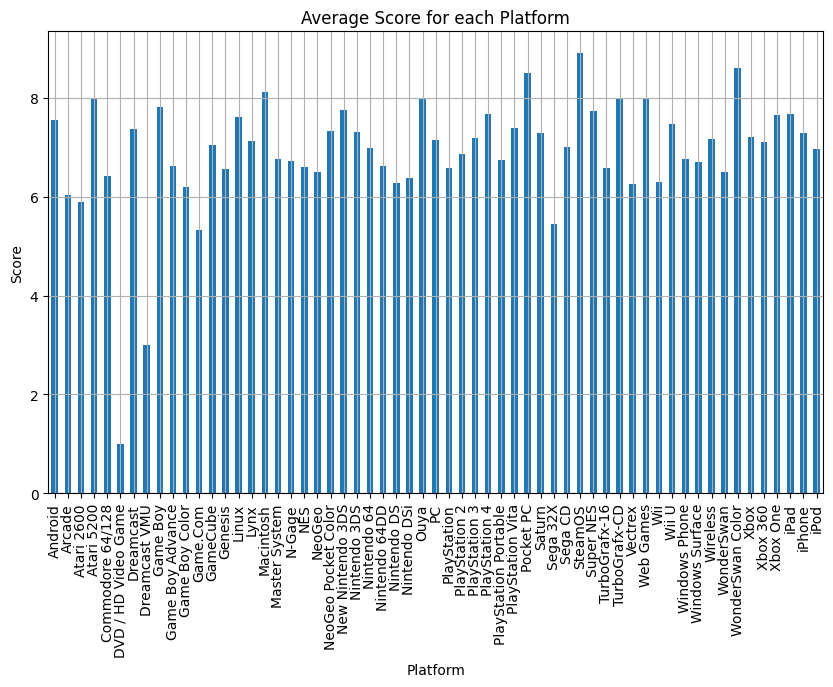

In [22]:
#What is the average score for each platform?
plt.figure(figsize=(10, 6))
ign_df.groupby('platform')['score'].mean().plot(kind="bar")

plt.title('Average Score for each Platform')
plt.xlabel('Platform')
plt.ylabel('Score')
plt.grid(True)

plt.show()

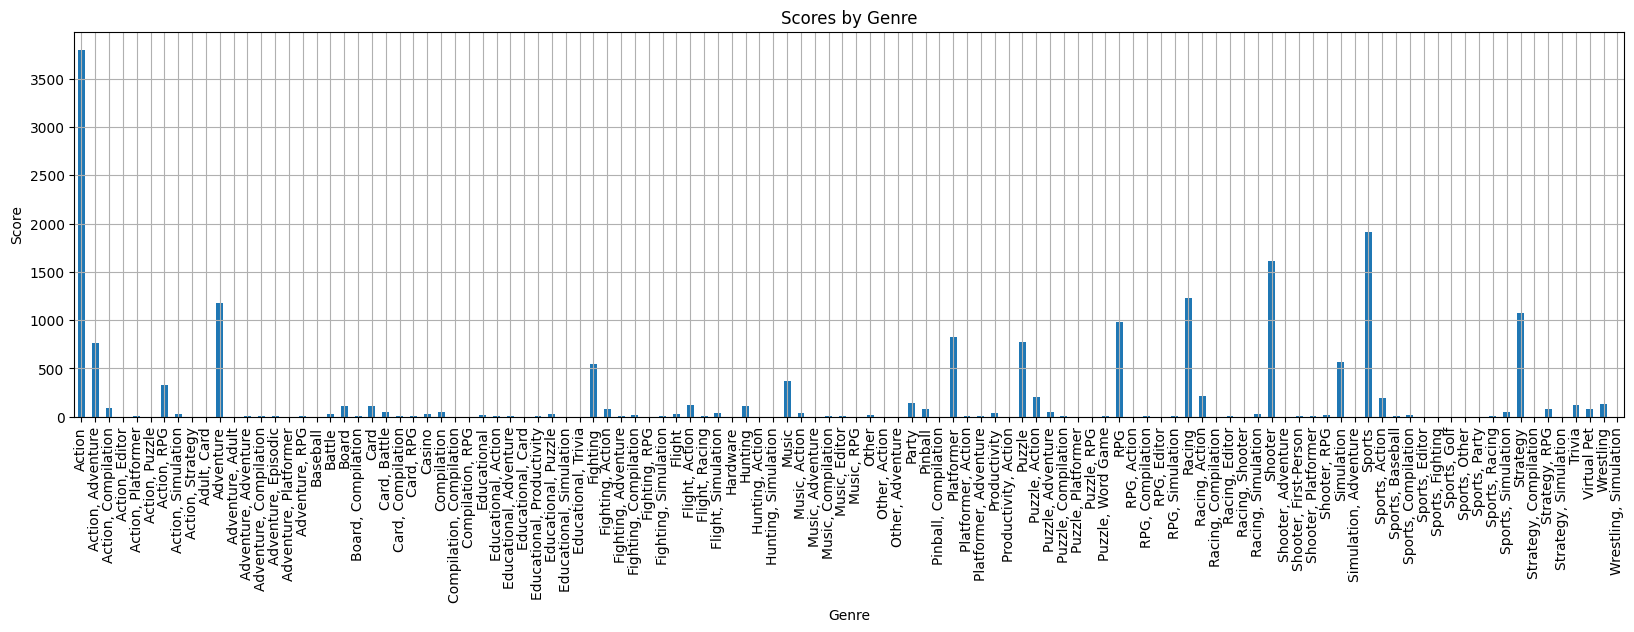

In [25]:
#How do scores vary by genre?
plt.figure(figsize=(20, 5))
ign_df.groupby('genre')['score'].count().plot(kind="bar")
plt.title('Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.grid(True)

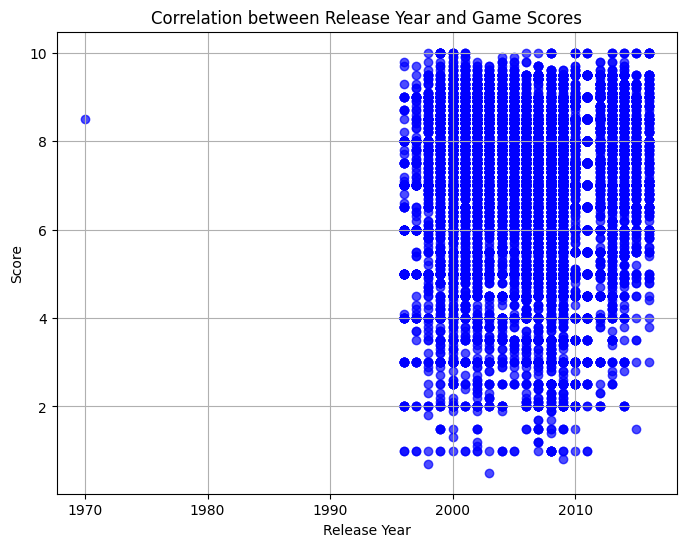

In [26]:
#Is there any correlation between release year and game scores?
plt.figure(figsize=(8, 6))
plt.scatter(ign_df['release_year'], ign_df['score'], color='blue', alpha=0.7)
plt.title('Correlation between Release Year and Game Scores')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.grid(True)
plt.show()

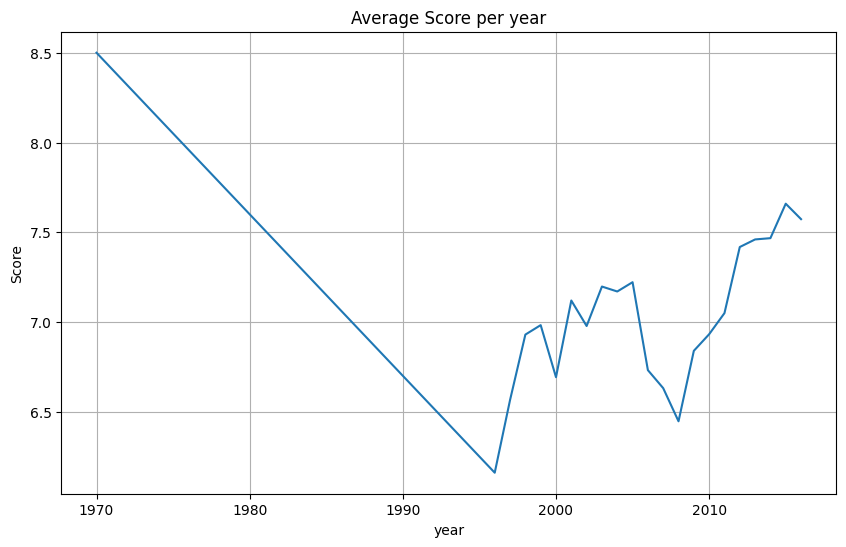

In [27]:
#Which year had the highest average game score?
plt.figure(figsize=(10, 6))
ign_df.groupby('release_year')['score'].mean().plot(kind="line")

plt.title('Average Score per year')
plt.xlabel('year')
plt.ylabel('Score')
plt.grid(True)

plt.show()

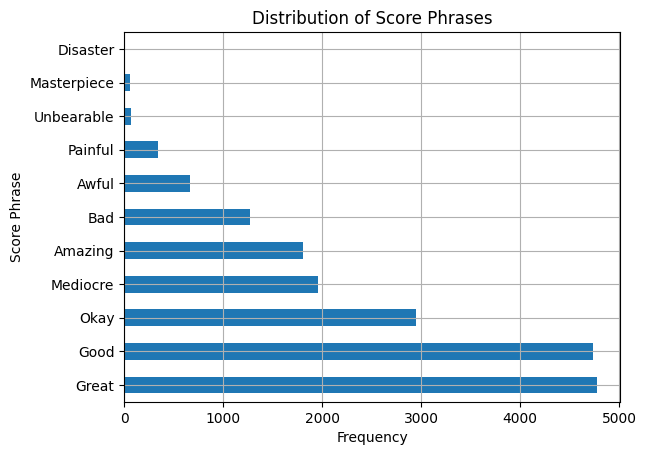

In [28]:
#What is the distribution of score phrases (e.g., Masterpiece, Awful)?
ign_df['score_phrase'].value_counts().plot(kind='barh')
plt.title('Distribution of Score Phrases')
plt.xlabel('Frequency')
plt.ylabel('Score Phrase')
plt.grid(True)
plt.show()

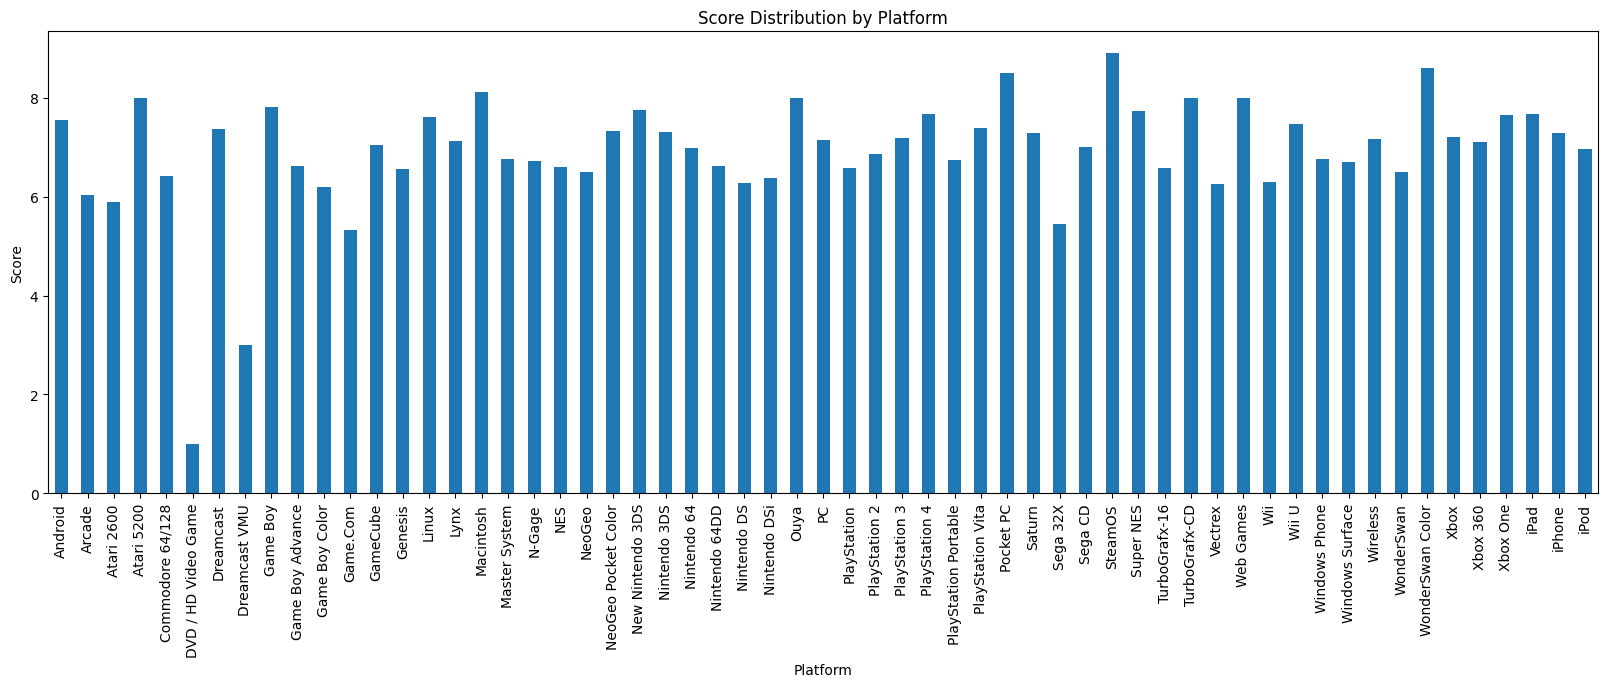

In [33]:
#How does the score distribution vary by platform?
plt.figure(figsize=(20, 6))
ign_df.groupby('platform')['score'].mean().plot(kind='bar')
plt.title('Score Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Score')
plt.show()

In [34]:
#Which game titles received the same score but different score phrases?
same_score_different_phrase = ign_df[ign_df.duplicated(subset=['score'], keep=False)]
same_score_different_phrase = same_score_different_phrase[same_score_different_phrase['score_phrase'] != '']
print(same_score_different_phrase)


                            title  score score_phrase        platform  \
0                  Checkered Flag   10.0  Masterpiece            Lynx   
1                  Chrono Trigger   10.0  Masterpiece             Wii   
2              Dragon Warrior III   10.0  Masterpiece  Game Boy Color   
3             Grand Theft Auto IV   10.0  Masterpiece        Xbox 360   
4             Grand Theft Auto IV   10.0  Masterpiece   PlayStation 3   
...                           ...    ...          ...             ...   
18617                Revolution X    1.0   Unbearable     PlayStation   
18618  Self-Defense Training Camp    1.0   Unbearable        Xbox 360   
18619                     Step Up    1.0   Unbearable             Wii   
18620    The Crow: City of Angels    1.0   Unbearable     PlayStation   
18621      The Simpsons Wrestling    1.0   Unbearable     PlayStation   

                   genre  release_year  release_month  release_day  
0                 Racing          1999              7 

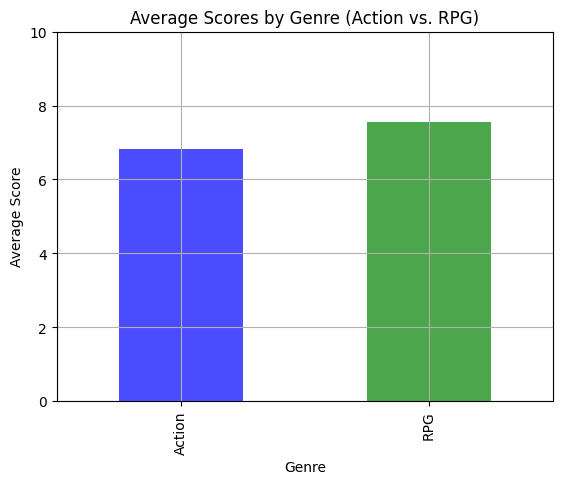

In [39]:
#How do scores differ between specific genres (e.g., Action vs. RPG)?
ign_df = ign_df.assign(genre=ign_df['genre'].str.split(',')).explode('genre').reset_index(drop=True)

# Strip any leading/trailing whitespace from the 'genre' column
ign_df['genre'] = ign_df['genre'].str.strip()

# Filter the DataFrame for specific genres (e.g., Action and RPG)
specific_genres = ign_df[ign_df['genre'].isin(['Action', 'RPG'])]

# Calculate the average score for each genre
average_scores_by_genre = specific_genres.groupby('genre')['score'].mean()

# Plot the average scores by genre in a bar graph
average_scores_by_genre.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Average Scores by Genre (Action vs. RPG)')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.ylim(0, 10)
plt.grid(True)
plt.show()



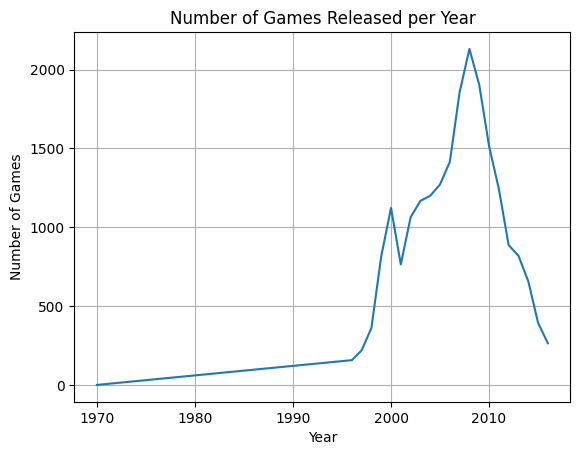

In [40]:
#How has the number of games released per year changed over time?
ign_df.groupby('release_year')['title'].count().plot(kind='line')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)

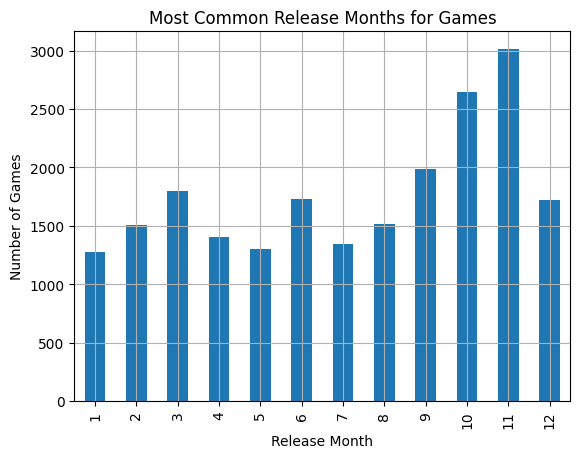

In [41]:
#What are the most common release months for games?
ign_df.groupby('release_month')['title'].count().plot(kind='bar')
plt.title('Most Common Release Months for Games')
plt.xlabel('Release Month')
plt.ylabel('Number of Games')
plt.grid(True)

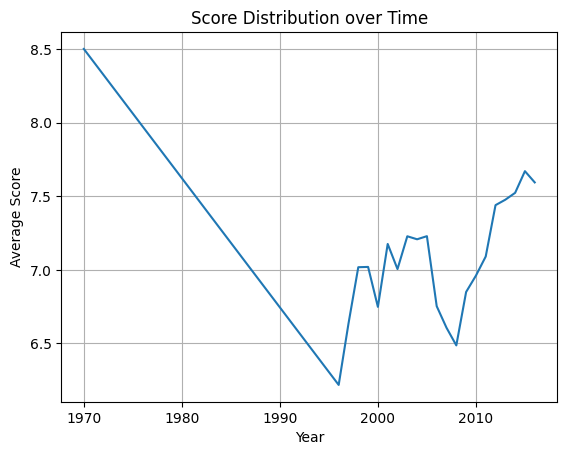

In [42]:
#Are there trends in the score distribution over time?
ign_df.groupby('release_year')['score'].mean().plot(kind='line')
plt.title('Score Distribution over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)

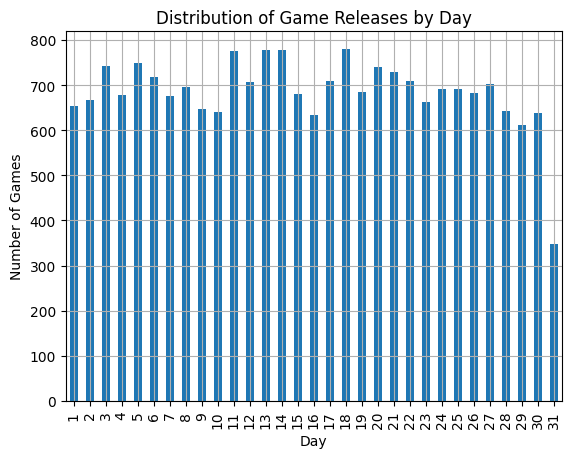

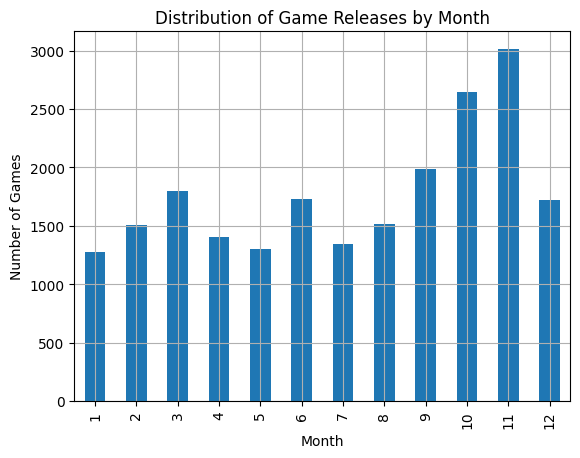

In [43]:
#What is the distribution of game releases by month and day?
ign_df.groupby('release_day')['title'].count().plot(kind='bar')
plt.title('Distribution of Game Releases by Day')
plt.xlabel('Day')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

ign_df.groupby('release_month')['title'].count().plot(kind='bar')
plt.title('Distribution of Game Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()



In [44]:
#Which platform has the highest-rated games on average?
avg_score_by_platform = ign_df.groupby('platform')['score'].mean()
highest_rated_platform = avg_score_by_platform.idxmax()
print(f"The platform with the highest-rated games on average is: {highest_rated_platform}")

The platform with the highest-rated games on average is: SteamOS


<Axes: xlabel='platform'>

<Figure size 2000x600 with 0 Axes>

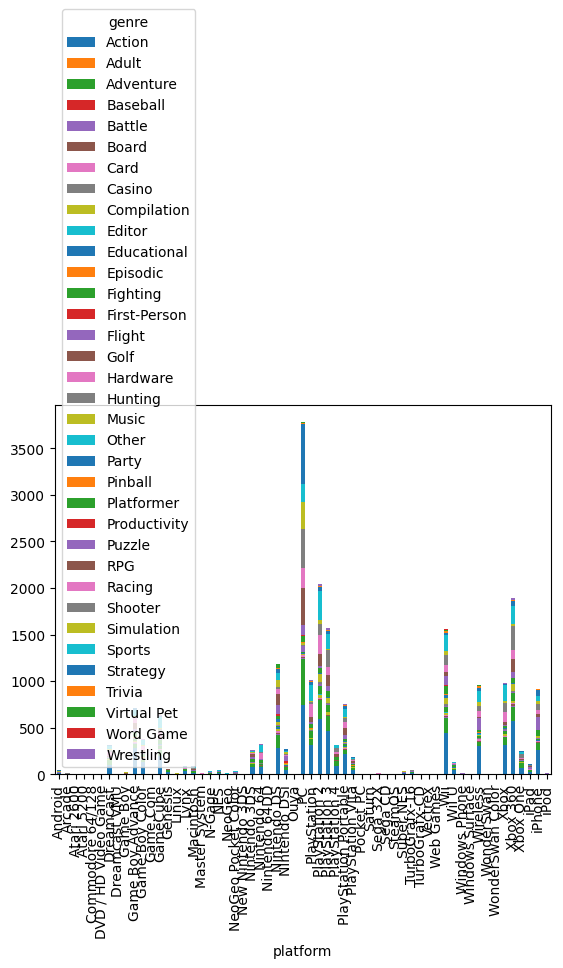

In [45]:
#How does the distribution of genres vary across platforms?
plt.figure(figsize=(20, 6))
platform_genre_counts = ign_df.groupby('platform')['genre'].value_counts()
all_plats = ign_df['platform'].unique()
platform_genre_counts[all_plats].unstack().plot(kind='bar', stacked=True)

In [46]:
#Which platform has the largest diversity of game genres?
platform_genre_diversity = ign_df.groupby('platform')['genre'].nunique()
largest_diversity_platform = platform_genre_diversity.idxmax()
print(f"The platform with the largest diversity of game genres is: {largest_diversity_platform}")

The platform with the largest diversity of game genres is: PC


In [47]:
#Which genres are most highly rated on specific platforms?
specif_plat = ign_df.groupby(['platform', 'genre'])['score'].mean()
specif_plat.head(30)

platform             genre      
Android              Action         6.875000
                     Battle         7.550000
                     Board          6.900000
                     Card           8.100000
                     Puzzle         8.760000
                     RPG            7.900000
                     Racing         6.500000
                     Shooter        8.350000
                     Simulation     7.500000
                     Sports         7.557143
                     Strategy       7.775000
Arcade               Action         4.916667
                     Fighting       6.250000
                     Music          9.400000
                     Shooter        6.250000
                     Sports         6.500000
Atari 2600           Action         7.250000
                     Adventure      7.500000
                     Other          3.500000
                     Shooter        4.000000
Atari 5200           Action         8.000000
Commodore 64/128     Action         7.333333
                     Adventure      7.500000
                     Racing         6.000000
                     Sports         4.500000
DVD / HD Video Game  Shooter        1.000000
Dreamcast            Action         7.266327
                     Adventure      6.835000
                     Casino         2.500000
                     Compilation    8.000000
Name: score, dtype: float64

In [48]:
#How many missing values are there in the "genre" column, and how should they be handled?
missing_values = ign_df['genre'].isnull().sum()
print(f"Number of missing values in 'genre' column: {missing_values}")

Number of missing values in 'genre' column: 36


In [50]:
#Are there any duplicate game titles across different platforms?
duplicate_titles = ign_df[ign_df.duplicated(subset=['title'], keep=False)]
duplicate_titles = duplicate_titles.sort_values(by=['title', 'platform'])
duplicate_titles[['title', 'platform']].head(30)


,title,platform
3272,.hack//INFECTION (Part 1),PlayStation 2
3273,.hack//INFECTION (Part 1),PlayStation 2
4460,.hack//MUTATION (Part 2),PlayStation 2
4461,.hack//MUTATION (Part 2),PlayStation 2
4462,.hack//OUTBREAK (Part 3),PlayStation 2
4463,.hack//OUTBREAK (Part 3),PlayStation 2
4823,.hack//QUARANTINE (Part 4),PlayStation 2
4824,.hack//QUARANTINE (Part 4),PlayStation 2
3274,0-D Beat Drop,Xbox 360
3275,0-D Beat Drop,Xbox 360


In [51]:
#Are there games with unusually high or low scores for their genre?
genre_stats = ign_df.groupby('genre')['score'].agg(['mean', 'std']).reset_index()

# Merge the stats back to the original dataframe
df = pd.merge(ign_df, genre_stats, on='genre', how='left')

# Calculate the Z-score
df['z_score'] = (ign_df['score'] - df['mean']) / df['std']

# Identify outliers
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

print(outliers[['title', 'score', 'mean', 'std', 'z_score']])

                                         title  score      mean       std  \
20482                                Animorphs    3.0  7.566782  1.407603   
20544                   Dragon Fantasy Book II    3.0  7.566782  1.407603   
20545                   Dragon Fantasy Book II    3.0  7.566782  1.407603   
20597                            King's Knight    3.0  7.566782  1.407603   
20600                              Last Battle    3.0  7.566782  1.407603   
...                                        ...    ...       ...       ...   
21236                 The Crow: City of Angels    1.0  6.822073  1.685473   
21237                   The Simpsons Wrestling    1.0  6.822073  1.685473   
21238                      Action Girlz Racing    0.8  6.741678  1.824265   
21239                       Extreme PaintBrawl    0.7  6.822073  1.685473   
21240  Looney Tunes: Back in Action: Zany Race    0.5  6.741678  1.824265   

        z_score  
20482 -3.244369  
20544 -3.244369  
20545 -3.244369  
205

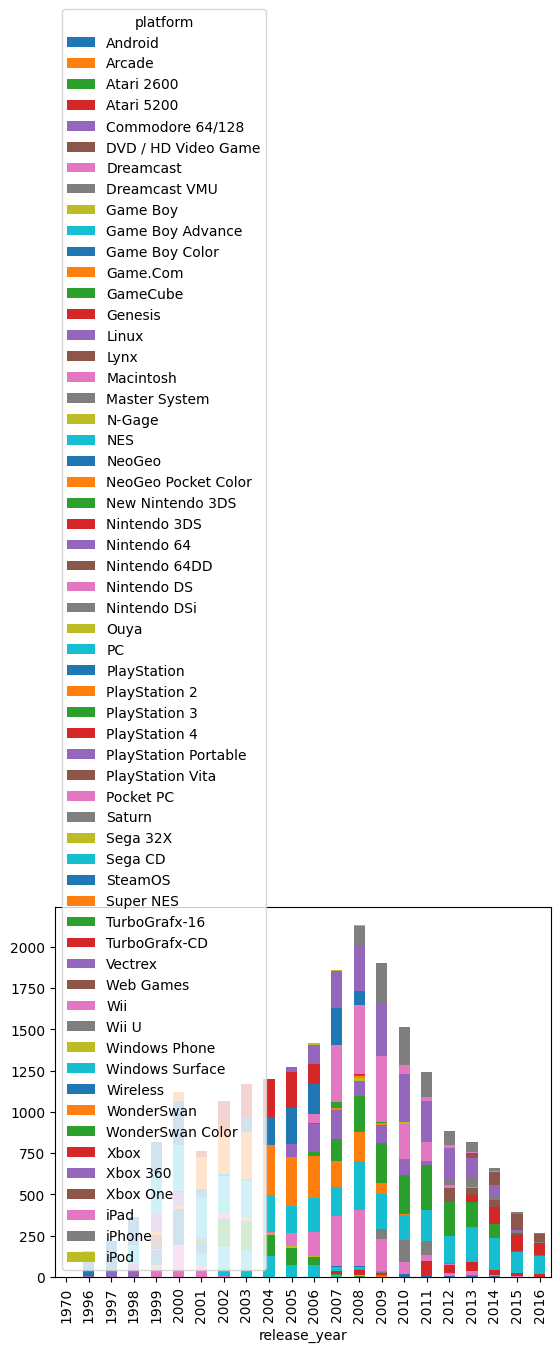

In [52]:
#What is the relationship between the release year and platform popularity?
ign_df.groupby(['release_year', 'platform'])['title'].count().unstack().plot(kind='bar', stacked=True)
plt.show()

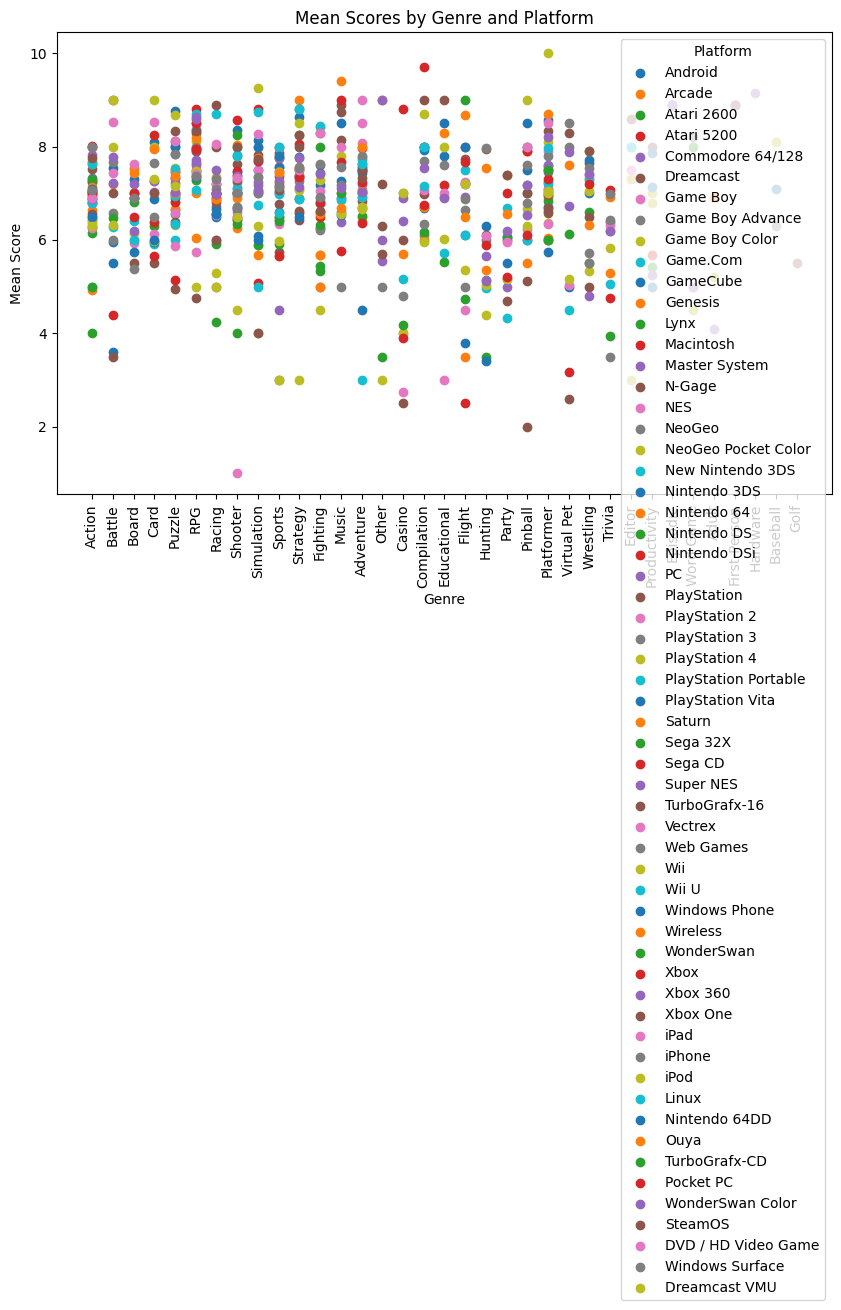

In [53]:
#Do certain genres tend to have higher average scores on specific platforms?
mean_scores = ign_df.groupby(['genre', 'platform'])['score'].mean().reset_index()

plt.figure(figsize=(10, 6))
for platform in mean_scores['platform'].unique():
    platform_data = mean_scores[mean_scores['platform'] == platform]
    plt.scatter(platform_data['genre'], platform_data['score'], label=platform)

plt.xlabel('Genre')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Genre and Platform')
plt.legend(title='Platform')
plt.xticks(rotation=90)
plt.show()